# Projekt 1

In [1]:
from torchmetrics.image import LearnedPerceptualImagePatchSimilarity as LPIPS, PeakSignalNoiseRatio as PSNR, StructuralSimilarityIndexMeasure as SSIM

In [25]:
import cv2
import tqdm
import numpy as np
from PIL import Image
from torchvision.transforms import InterpolationMode
from dataset import ImagePairDataset
from torchvision import transforms

In [13]:
lpips = LPIPS()
psnr = PSNR()
ssim = SSIM()

## Zwiększanie rozdzielczości obrazów 

### 32x32 -> 256x256

In [3]:
# Resize to 32x32 for training
transform = transforms.Compose([
    transforms.Resize((32, 32), interpolation=InterpolationMode.BICUBIC),
    # transforms.ToTensor()
])
# Comparing result is done on 256x256 images
original_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    # transforms.ToTensor()
])
dataset = ImagePairDataset(image_dir='div2k/DIV2K_train_HR', transform=transform, original_transform=original_transform)

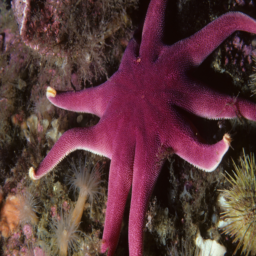

In [4]:
dataset[0][0]

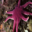

In [5]:
dataset[0][1]

In [14]:
tensorize = transforms.ToTensor()

In [28]:
scores = {
    'lpips': [],
    'psnr': [],
    'ssim': [],
}
for original, downsized in tqdm.tqdm(dataset):
    arr = np.array(downsized)
    upsized = cv2.resize(arr, (256, 256), interpolation=cv2.INTER_CUBIC)
    orig = tensorize(original).unsqueeze(0)
    ups = tensorize(Image.fromarray(upsized)).unsqueeze(0)
    scores['lpips'].append(lpips(ups, orig).item())
    scores['psnr'].append(psnr(ups, orig).item())
    scores['ssim'].append(ssim(ups, orig).item())

100%|██████████| 800/800 [01:03<00:00, 12.63it/s]


In [30]:
for key, value in scores.items():
    print(key, np.mean(value))

lpips 0.6172836787253618
psnr 21.027778763771057
ssim 0.5088848387636244


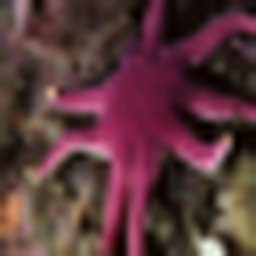

In [19]:
Image.fromarray(upsized)

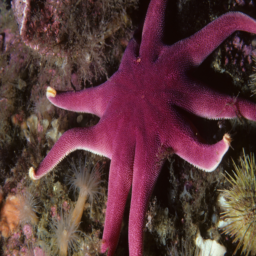

In [21]:
original